<a href="https://colab.research.google.com/github/YasaminRhd/Pythonia.init/blob/main/Session%206%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

Saving abcd123.png to abcd123 (3).png


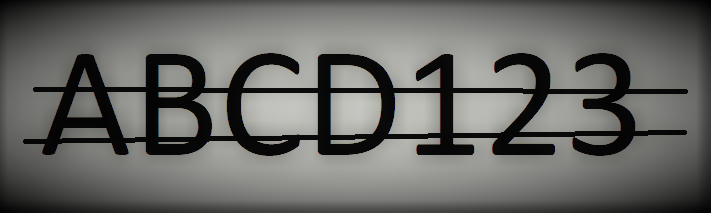

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
img = np.array(Image.open(io.BytesIO(uploaded['abcd123.png'])))
display(Image.fromarray(img))

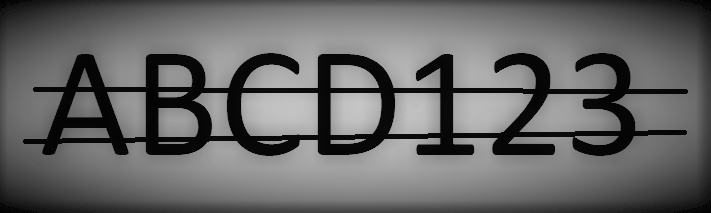

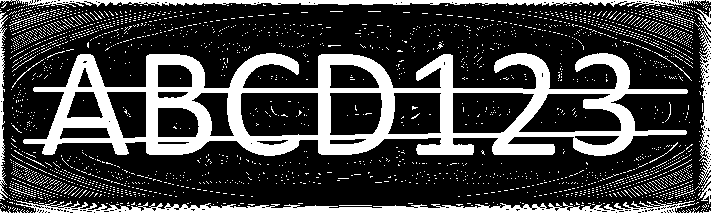

In [ ]:
img1 = cv.imread('abcd123.png', cv.IMREAD_GRAYSCALE) 
# img2 = cv.imread('bcd12a.png')
# img3 = cv.imread('dad32.png')
display(Image.fromarray(img1))
#bw = cv.adaptiveThreshold(img1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,17,10)
bw = cv.adaptiveThreshold(img1,255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,17,1)
display(Image.fromarray(bw))

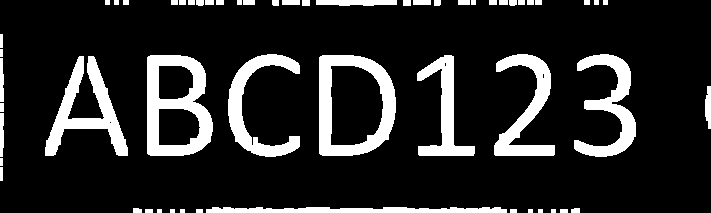

In [ ]:
kernel = np.ones((3,4), np.uint8)
#kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
opening = cv.morphologyEx(bw, cv.MORPH_OPEN, kernel)

#kernel = cv.getStructuringElement(cv.MORPH_CROSS,(8,5))
kernel = np.ones((8,5), np.uint8)
closing = cv.morphologyEx(opening, cv.MORPH_OPEN, kernel)
display(Image.fromarray(closing))

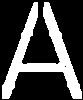

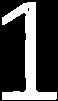

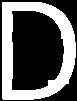

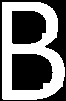

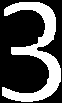

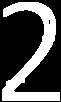

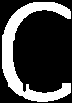

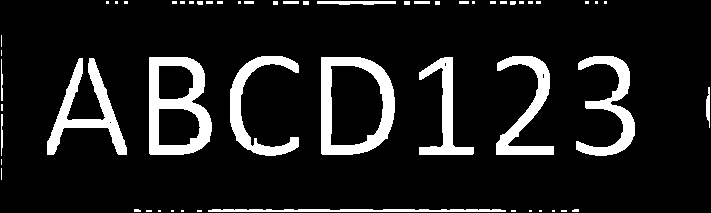

In [ ]:
contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 
#eachLetter = np.array(Image.open('abcd123.png'))
#eachLetter = closing
cv.drawContours(closing, contours, -1, (0,255,0), 1)
#display(Image.fromarray(eachLetter))
for i in range(len(contours)):
  cnt = contours[i]
  area = cv.contourArea(cnt)
  if area > 1000:
    cv.drawContours(closing, contours, i,  (0,255,0), 1)
    x,y,w,h = cv.boundingRect(cnt)
    cv.rectangle(closing, (x,y), (x+w, y+h), (0,0,255), 2)
    croped = closing[y:y+h, x:x+w]
    display(Image.fromarray(croped))

display(Image.fromarray(closing))

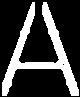

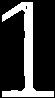

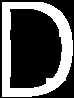

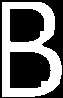

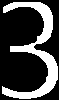

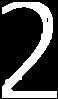

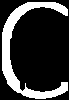

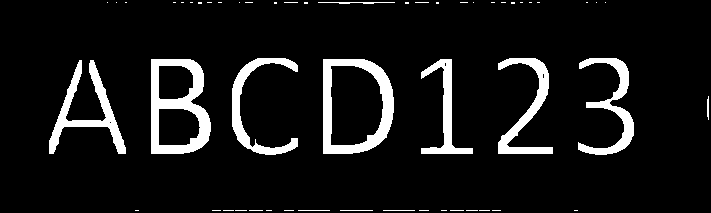

In [ ]:
contours, hierarchy = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 
#eachLetter = np.array(Image.open('abcd123.png'))
#eachLetter = closing
cv.drawContours(closing, contours, -1, (0,255,0), 1)
#display(Image.fromarray(eachLetter))
for i in range(len(contours)):
  cnt = contours[i]
  area = cv.contourArea(cnt)
  if area > 1000:
    cv.drawContours(closing, contours, i,  (0,255,0), 1)
    x,y,w,h = cv.boundingRect(cnt)
    cv.rectangle(closing, (x,y), (x+w, y+h), (0,0,255), 2)
    croped = closing[y:y+h, x:x+w]
    display(Image.fromarray(croped))
    cv.imwrite('pic{:>5}.jpg'.format(i), croped)


display(Image.fromarray(closing))